# Data Extraction

**Install Kaggle client**

In [24]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\vaibh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


**Configure Kaggle API key**

**Created Kaggle API token by clicking on "Create New API Token" Option of API Section of Kaggle account settings page and this downloaded `kaggle.json` file.**

In [13]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = 'kaggle_config'

**Downloading the data using Kaggle API/CLI**

In [11]:
!kaggle datasets download sohyunjun0401/h-and-m-personalized-fashion-data

Dataset URL: https://www.kaggle.com/datasets/sohyunjun0401/h-and-m-personalized-fashion-data
License(s): unknown




  0%|          | 0.00/93.0M [00:00<?, ?B/s]
  8%|▊         | 7.00M/93.0M [00:00<00:01, 72.8MB/s]
 39%|███▊      | 36.0M/93.0M [00:00<00:00, 207MB/s] 
 83%|████████▎ | 77.0M/93.0M [00:00<00:00, 306MB/s]
100%|██████████| 93.0M/93.0M [00:00<00:00, 282MB/s]


In [12]:
import zipfile
import os


# Check if the directory exists and create it if necessary (good practice)
os.makedirs('data/raw', exist_ok=True)

# Extract the contents
with zipfile.ZipFile('h-and-m-personalized-fashion-data.zip', 'r') as zip_ref:
    zip_ref.extractall('data/raw')
    print(f"Successfully extracted zip to: 'data/raw'")

Successfully extracted zip to: 'data/raw'


# Data Audit & Availability Check

In [17]:
import pandas as pd

transactions_df = pd.read_csv('data/raw/transactions_hm.csv')

# 1. Check Data Structure and Non-Null Counts (Availability Check)
print("--- 1. DataFrame Structure & Availability ---")
transactions_df.info()

# 2. Check for Missing Values (Explicit Check)
print("\n--- 2. Total Missing Values per Column ---")
print(transactions_df.isnull().sum())

# 3. Check Numerical Summary (e.g., 'price')
print("\n--- 3. Price Column Descriptive Statistics ---")
print(transactions_df['price'].describe())

# 4. Check Categorical/ID Value Counts (e.g., 'sales_channel_id')
print("\n--- 4. Sales Channel ID Distribution (Top 5) ---")
print(transactions_df['sales_channel_id'].value_counts().head())



##################################################################

articles_df = pd.read_csv('data/raw/articles_hm.csv')[['article_id', 'index_group_name']]

# Here for each article, we selected only 'article_id' and 'index_group_name',
# since index_group_name is a key categorical variable compared across other variables.

# Assuming your DataFrame is named articles_df
print("--- 1. DataFrame Structure & Availability Check ---")
articles_df.info()

print("\n--- 2. Missing Value Count ---")
print(articles_df.isnull().sum())

print("\n--- 3. Article ID Uniqueness Check (Should be True) ---")
print(articles_df['article_id'].nunique() == len(articles_df))

print("\n--- 4. Group Distribution ---")
print(articles_df['index_group_name'].value_counts())

##################################################################

customers_df = pd.read_csv('data/raw/customer_hm.csv')[['customer_id', 'age', 'Active', 'fashion_news_frequency']]

# 1. Overall Structure and Missing Data
print("--- 1. DataFrame Structure & Availability Check ---")
customers_df.info()

# 2. Detailed Missing Value Count
print("\n--- 2. Total Missing Values per Column ---")
print(customers_df.isnull().sum())

# 3. Numerical Audit (Age)
print("\n--- 3. Age Descriptive Statistics ---")
print(customers_df['age'].describe())

# 4. Categorical Audit (Club Member Status)
print("\n--- 4. fashion_news_frequency Distribution (including NaN) ---")
print(customers_df['fashion_news_frequency'].value_counts(dropna=False))

--- 1. DataFrame Structure & Availability ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t_dat             1048575 non-null  object 
 1   customer_id       1048575 non-null  object 
 2   article_id        1048575 non-null  int64  
 3   price             1048575 non-null  float64
 4   sales_channel_id  1048575 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 40.0+ MB

--- 2. Total Missing Values per Column ---
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

--- 3. Price Column Descriptive Statistics ---
count    1.048575e+06
mean     2.777915e-02
std      1.935764e-02
min      2.372880e-04
25%      1.523729e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.067797e-01
Name: price, dtype: float64

--- 4. Sales Cha

# Exploratory Data Analysis

Analyzing Transactions Dataset
======= Starting Comprehensive EDA =======

=== Basic DataFrame Info ===
Shape: (1048575, 3)

Data Types:
t_dat               datetime64[ns]
price                      float64
sales_channel_id             int64
dtype: object

Memory Usage:
Index               0.000126
t_dat               7.999992
price               7.999992
sales_channel_id    7.999992
dtype: float64 MB

Sample Data:


,t_dat,price,sales_channel_id
0,2019-11-05,0.016932,2
1,2019-05-22,0.033881,2
2,2019-05-10,0.016932,2
3,2019-08-26,0.033881,2
4,2019-08-10,0.003220,1



Basic Statistics:


,count,mean,min,25%,50%,75%,max,std
t_dat,1048575,2019-06-27 12:01:40.730992128,2019-01-01 00:00:00,2019-04-08 00:00:00,2019-06-25 00:00:00,2019-09-17 00:00:00,2019-12-31 00:00:00,NaN
price,1048575.0,0.027779,0.000237,0.015237,0.025407,0.033881,0.50678,0.019358
sales_channel_id,1048575.0,1.695412,1.0,1.0,2.0,2.0,2.0,0.460233


=== Missing Values Analysis ===


,Missing_Count,Missing_Percent


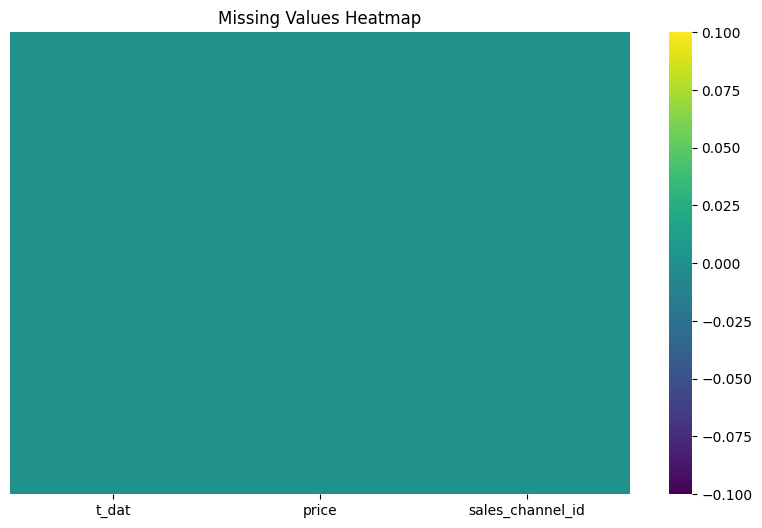

=== Numerical Features Analysis ===

Analyzing: price

Statistics:
count    1.048575e+06
mean     2.777915e-02
std      1.935764e-02
min      2.372880e-04
25%      1.523729e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.067797e-01
Name: price, dtype: float64


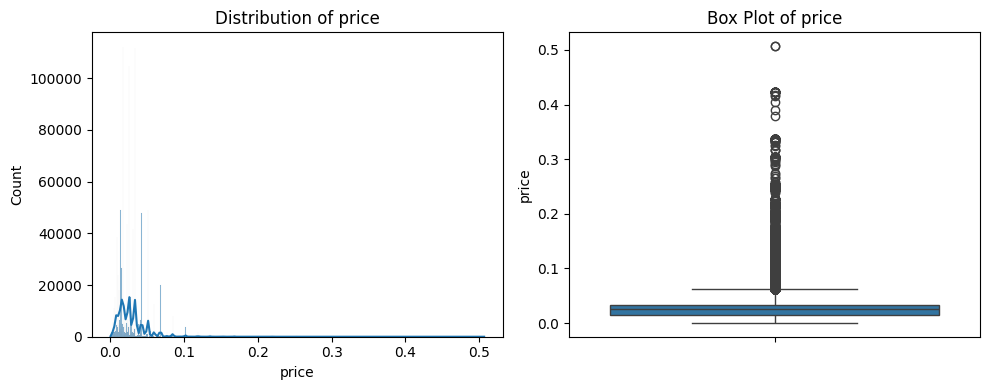


Skewness: 3.04
Kurtosis: 23.55

Analyzing: sales_channel_id

Statistics:
count    1.048575e+06
mean     1.695412e+00
std      4.602328e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: sales_channel_id, dtype: float64


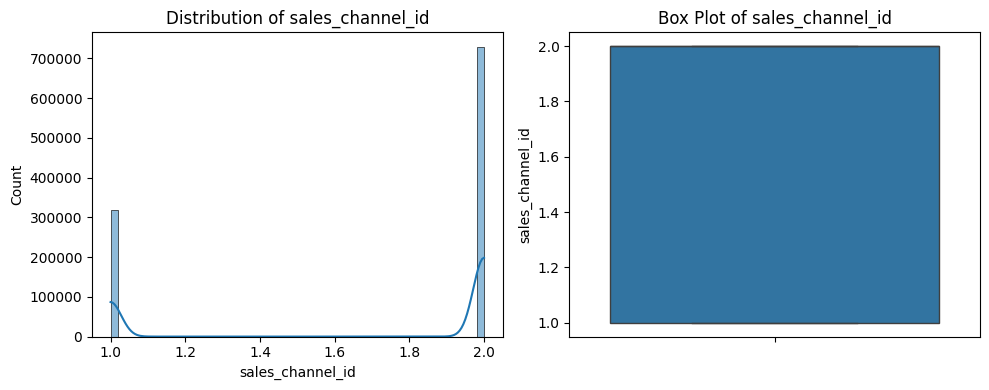


Skewness: -0.85
Kurtosis: -1.28
=== Categorical Features Analysis ===
=== Time Series Analysis ===

Time Range:
Start: 2019-01-01 00:00:00
End: 2019-01-01 00:00:00
Time Span: 364 days


C:\Users\vaibh\AppData\Local\Temp\ipykernel_13840\292882267.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column])
C:\Users\vaibh\AppData\Local\Temp\ipykernel_13840\292882267.py:147: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index(date_column).resample('M').size()


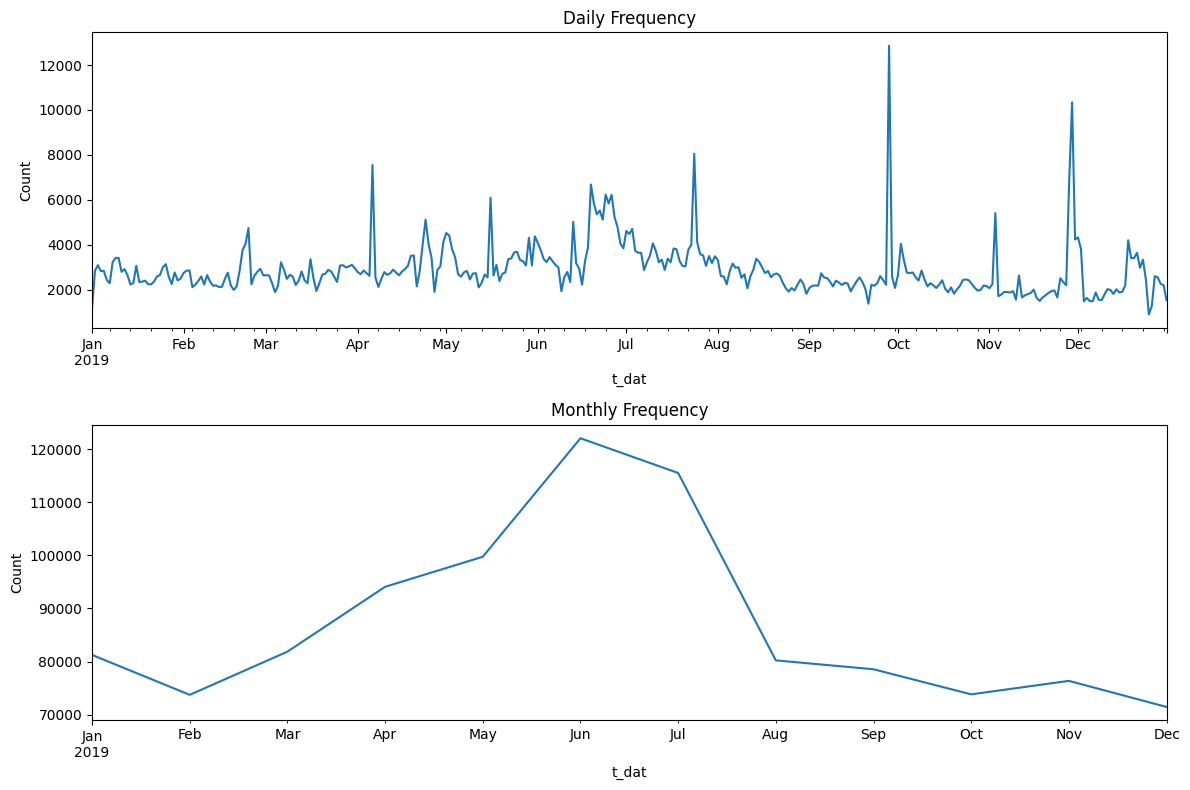


======= EDA Complete =======

Analyzing Customers Dataset
======= Starting Comprehensive EDA =======

=== Basic DataFrame Info ===
Shape: (1048575, 3)

Data Types:
Active                     int64
fashion_news_frequency    object
age                        int64
dtype: object

Memory Usage:
Index                      0.000126
Active                     7.999992
fashion_news_frequency    54.781454
age                        7.999992
dtype: float64 MB

Sample Data:


,Active,fashion_news_frequency,age
0,0,NONE,49
1,0,NONE,25
2,0,NONE,24
3,0,NONE,54
4,1,Regularly,52



Basic Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Active,1048575.0,NaN,NaN,NaN,0.346133,0.475736,0.0,0.0,0.0,1.0,1.0
fashion_news_frequency,1048574,3,NONE,674698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1048575.0,NaN,NaN,NaN,36.369194,14.308991,16.0,24.0,32.0,49.0,99.0


=== Missing Values Analysis ===


,Missing_Count,Missing_Percent
fashion_news_frequency,1,0.0


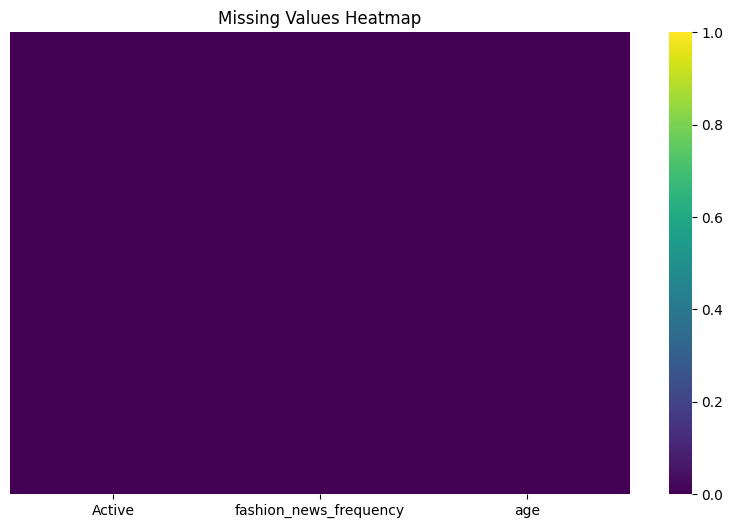

=== Numerical Features Analysis ===

Analyzing: Active

Statistics:
count    1.048575e+06
mean     3.461326e-01
std      4.757363e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Active, dtype: float64


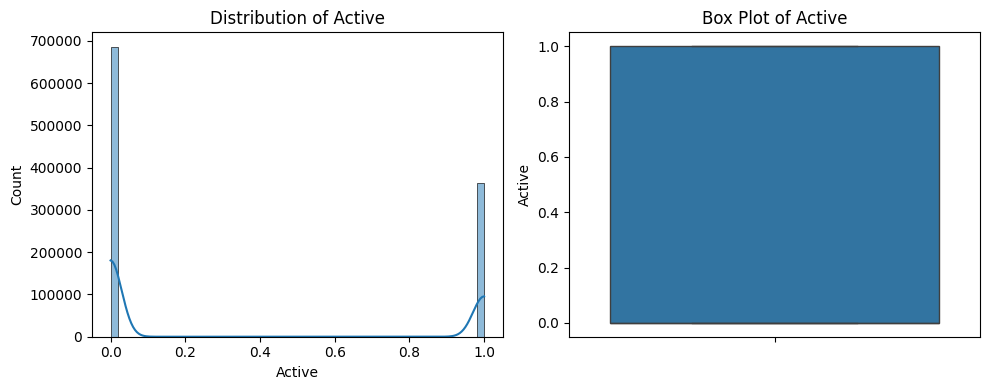


Skewness: 0.65
Kurtosis: -1.58

Analyzing: age

Statistics:
count    1.048575e+06
mean     3.636919e+01
std      1.430899e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64


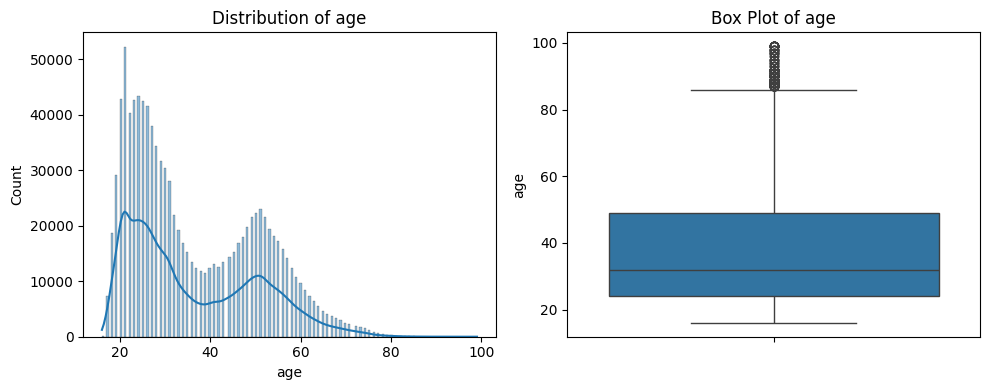


Skewness: 0.61
Kurtosis: -0.71
=== Categorical Features Analysis ===

Analyzing: fashion_news_frequency

Unique values: 3


,Count,Percentage
fashion_news_frequency,,
NONE,674698,64.34
Regularly,373218,35.59
Monthly,658,0.06


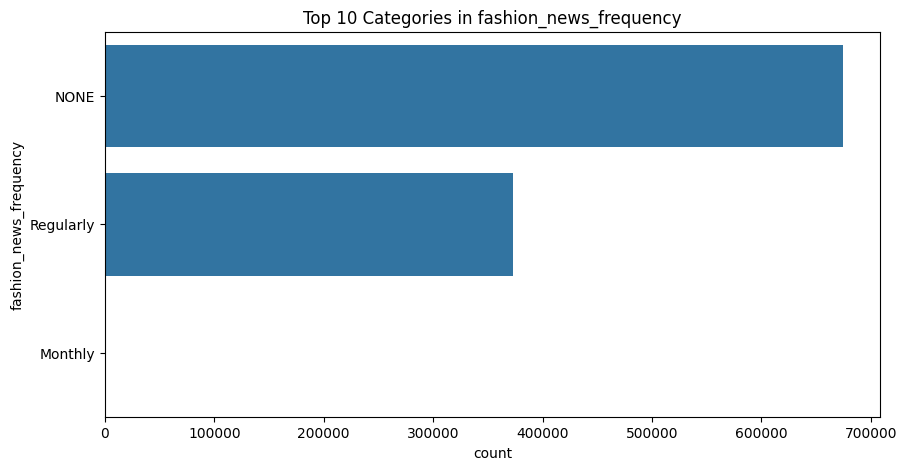


======= EDA Complete =======

Analyzing Articles Dataset
======= Starting Comprehensive EDA =======

=== Basic DataFrame Info ===
Shape: (105542, 1)

Data Types:
index_group_name    object
dtype: object

Memory Usage:
Index               0.000126
index_group_name    5.954359
dtype: float64 MB

Sample Data:


,index_group_name
0,Ladieswear
1,Ladieswear
2,Ladieswear
3,Ladieswear
4,Ladieswear



Basic Statistics:


,count,unique,top,freq
index_group_name,105542,5,Ladieswear,39737


=== Missing Values Analysis ===


,Missing_Count,Missing_Percent


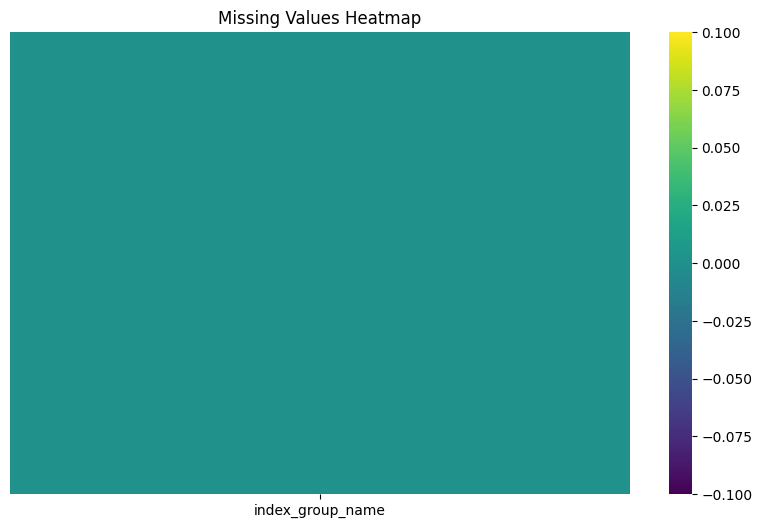

=== Numerical Features Analysis ===
=== Categorical Features Analysis ===

Analyzing: index_group_name

Unique values: 5


,Count,Percentage
index_group_name,,
Ladieswear,39737,37.65
Baby/Children,34711,32.89
Divided,15149,14.35
Menswear,12553,11.89
Sport,3392,3.21


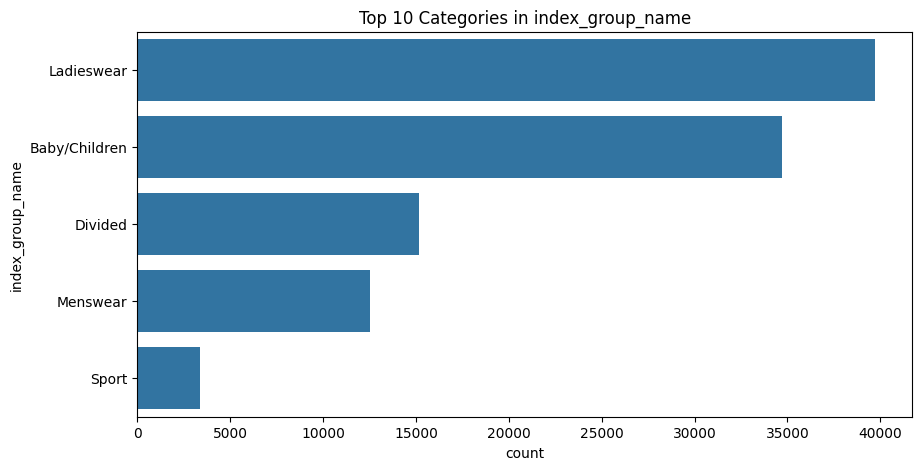


======= EDA Complete =======


In [18]:
# 1. Basic DataFrame Information and Statistics

def basic_eda(df):
    print("=== Basic DataFrame Info ===")
    print(f"Shape: {df.shape}")
    print("\nData Types:")
    print(df.dtypes)
    print("\nMemory Usage:")
    print(df.memory_usage(deep=True) / 1024**2, 'MB')
    print("\nSample Data:")
    display(df.head())
    print("\nBasic Statistics:")
    display(df.describe(include='all').T)

# 2. Missing Values Analysis

def analyze_missing_values(df):
    # Missing values count and percentage
    missing = pd.DataFrame({
        'Missing_Count': df.isnull().sum(),
        'Missing_Percent': (df.isnull().sum() / len(df) * 100).round(2)
    }).sort_values('Missing_Percent', ascending=False)
    
    # Only show columns with missing values
    missing = missing[missing['Missing_Count'] > 0]
    
    print("=== Missing Values Analysis ===")
    display(missing)
    
    # Visualize missing values
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

# 3. Numerical Features Analysis

def analyze_numerical(df):
    print("=== Numerical Features Analysis ===")
    
    # Select numerical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in num_cols:
        print(f"\nAnalyzing: {col}")
        
        # Basic statistics
        stats = df[col].describe()
        print("\nStatistics:")
        print(stats)
        
        # Distribution plot
        plt.figure(figsize=(10, 4))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        
        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col].dropna())
        plt.title(f'Box Plot of {col}')
        
        plt.tight_layout()
        plt.show()
        
        # Skewness and Kurtosis
        print(f"\nSkewness: {df[col].skew():.2f}")
        print(f"Kurtosis: {df[col].kurtosis():.2f}")

# 4. Categorical Features Analysis

def analyze_categorical(df):
    print("=== Categorical Features Analysis ===")
    
    # Select categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in cat_cols:
        print(f"\nAnalyzing: {col}")
        
        # Value counts and percentages
        val_counts = df[col].value_counts()
        val_percentages = df[col].value_counts(normalize=True) * 100
        
        summary = pd.DataFrame({
            'Count': val_counts,
            'Percentage': val_percentages.round(2)
        })
        
        print(f"\nUnique values: {df[col].nunique()}")
        display(summary)
        
        # Bar plot
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])
        plt.title(f'Top 10 Categories in {col}')
        plt.show()

# 5. Correlation Analysis

def analyze_correlations(df):
    print("=== Correlation Analysis ===")
    
    # Select numerical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Compute correlations
    corr_matrix = df[num_cols].corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()
    
    # Find high correlations
    high_corr = np.where(np.abs(corr_matrix) > 0.7)
    high_corr = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                 for x, y in zip(*high_corr) if x != y and x < y]
    
    if high_corr:
        print("\nHigh Correlations (>0.7):")
        for var1, var2, corr in high_corr:
            print(f"{var1} -- {var2}: {corr:.2f}")

# 6. Time Series Analysis

def analyze_timeseries(df, date_column):
    print("=== Time Series Analysis ===")
    
    # Convert to datetime if needed
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Basic time stats
    print("\nTime Range:")
    print(f"Start: {df[date_column].min()}")
    print(f"End: {df[date_column].min()}")
    print(f"Time Span: {(df[date_column].max() - df[date_column].min()).days} days")
    
    # Time-based aggregations
    daily = df.set_index(date_column).resample('D').size()
    monthly = df.set_index(date_column).resample('M').size()
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Daily counts
    daily.plot(ax=ax1, title='Daily Frequency')
    ax1.set_ylabel('Count')
    
    # Monthly counts
    monthly.plot(ax=ax2, title='Monthly Frequency')
    ax2.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# 7. Combined EDA Function

def comprehensive_eda(df, date_column=None):
    """
    Run comprehensive EDA on a dataframe
    
    Parameters:
    df: pandas DataFrame
    date_column: str, optional - name of datetime column for time series analysis
    """
    
    print("======= Starting Comprehensive EDA =======\n")
    
    # Basic EDA
    basic_eda(df)
    
    # Missing Values
    analyze_missing_values(df)
    
    # Numerical Analysis
    analyze_numerical(df)
    
    # Categorical Analysis
    analyze_categorical(df)
    
    # Time Series Analysis (if date_column provided)
    if date_column and date_column in df.columns:
        analyze_timeseries(df, date_column)
    
    print("\n======= EDA Complete =======")

import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler

# --- Load Data ---
try:
    # Use 'object' type for IDs to preserve leading zeros/format if necessary
    transactions = pd.read_csv('data/raw/transactions_hm.csv', parse_dates=['t_dat'])
    customers = pd.read_csv('data/raw/customer_hm.csv', dtype={'customer_id': str})
    articles = pd.read_csv('data/raw/articles_hm.csv')
except Exception as e:
    print(f"Error loading data: {e}")

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('seaborn')

# Run EDA on each dataset
print("Analyzing Transactions Dataset")
comprehensive_eda(transactions[['t_dat', 'price', 'sales_channel_id']], date_column='t_dat')

print("\nAnalyzing Customers Dataset")
comprehensive_eda(customers[['Active', 'fashion_news_frequency', 'age']])

print("\nAnalyzing Articles Dataset")
comprehensive_eda(articles[['index_group_name']])

# Data Cleaning

In [21]:
import pandas as pd

transactions_df = pd.read_csv('data/raw/transactions_hm.csv')

# Assuming transactions_df has columns: t_dat, customer_id, article_id, price, sales_channel_id

print("Starting Transactions DF cleaning...")

# 1. Column Selection (Not needed here as we keep all)
transactions_df_clean = transactions_df.copy()

# 2. Critical Step: Convert t_dat to datetime object
# This ensures it's usable for time-series analysis and avoids future type errors.
transactions_df_clean['t_dat'] = pd.to_datetime(transactions_df_clean['t_dat'])

# 3. Remove rows with ANY missing value (based on your request)
# This will ensure every transaction has a date, customer, article, price, and channel.
transactions_df_clean.dropna(how='any', inplace=True)

print(f"Transactions DF: {len(transactions_df)} rows -> {len(transactions_df_clean)} clean rows.")

transactions_df_clean.to_csv('data/cleaned/transactions.csv', index = False)

##############################################################################

articles_df = pd.read_csv('data/raw/articles_hm.csv')

# Assuming articles_df has columns: article_id, index_group_name, garment_group_name

print("\nStarting Articles DF cleaning...")

# 1. Column Selection (Not needed here as we keep all)
articles_df_clean = articles_df.copy()

# 2. Ensure article_id is not null (crucial for foreign key joins)
# The dropna(how='any') handles this and the other columns.
articles_df_clean.dropna(how='any', inplace=True)

print(f"Articles DF: {len(articles_df)} rows -> {len(articles_df_clean)} clean rows.")

# Here We're only selecting 'article_id' and 'index_group_name' columns in cleaned dataframe,
# cause index_group_name is a key categorical variable compared across other variables. Some of variables either had too many categories and some didn't seem useful for segmentation

article_df_filtered = articles_df[['article_id', 'index_group_name']]
print("Removed all columns from articles dataframe except article_id and index_group_name.")

article_df_filtered.to_csv('data/cleaned/articles.csv', index=False)
print("Saved cleaned articles dataframe to articles-cleaned.csv")

##############################################################################

customers_df = pd.read_csv('data/raw/customer_hm.csv')

# Assuming customers_df has columns: customer_id, FN, Active, club_member_status, fashion_news_frequency, age

print("\nStarting Customers DF cleaning...")

# 1. Column Selection (Not needed here as we keep all)
customers_df_clean = customers_df.copy()

# 2. Remove rows with ANY missing value (based on your request)
# This will drop rows where age is missing, or any of the status/flag columns are missing.
customers_df_clean.dropna(how='any', inplace=True)

print(f"Customers DF: {len(customers_df)} rows -> {len(customers_df_clean)} clean rows.")

customers_df_clean_filtered = customers_df_clean[['customer_id', 'Active', 'fashion_news_frequency', 'age']]

customers_df_clean_filtered.rename(columns={'Active': 'is_newsletter_active'}, inplace=True)

customers_df_clean_filtered.to_csv('data/cleaned/customers.csv', index=False)

Starting Transactions DF cleaning...
Transactions DF: 1048575 rows -> 1048575 clean rows.

Starting Articles DF cleaning...
Articles DF: 105542 rows -> 105126 clean rows.
Removed all columns from articles dataframe except article_id and index_group_name.
Saved cleaned articles dataframe to articles-cleaned.csv

Starting Customers DF cleaning...
Customers DF: 1048575 rows -> 1048574 clean rows.


C:\Users\vaibh\AppData\Local\Temp\ipykernel_13840\172986142.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df_clean_filtered.rename(columns={'Active': 'is_newsletter_active'}, inplace=True)


# Feature Creation

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler

# --- Load Data ---
try:
    # Use 'object' type for IDs to preserve leading zeros/format if necessary
    transactions = pd.read_csv('data/cleaned/transactions.csv', parse_dates=['t_dat'])
    customers = pd.read_csv('data/cleaned/customers.csv', dtype={'customer_id': str})
    articles = pd.read_csv('data/cleaned/articles.csv')
    
    # Define the latest date in the dataset to calculate Recency
    LAST_DATE = transactions['t_dat'].max() + pd.Timedelta(days=1)
    
    # Merge transactions with essential article metadata early for behavioral features
    tx_articles = pd.merge(transactions, 
                           articles, 
                           on='article_id', how='left')
   
except Exception as e:
    print(f"Error loading data: {e}")

# --- Engineer RFM Features ---
rfm_df = transactions.groupby('customer_id').agg(
    # Recency: Days since last purchase
    Recency=('t_dat', lambda x: (LAST_DATE - x.max()).days),
    # Frequency: Total number of *unique* transaction dates (orders)
    Frequency=('t_dat', 'nunique'),
    # Total Items: Total number of articles purchased
    Total_Items=('article_id', 'count'),
    # Monetary: Total spend (sum of price)
    Monetary=('price', 'sum'),
    # Channel Preference: Mean sales channel (1=online, 2=store)
    Avg_Channel=('sales_channel_id', 'mean')
).reset_index()

# Calculate derived RFM metrics
rfm_df['Avg_Order_Value'] = rfm_df['Monetary'] / rfm_df['Frequency']
rfm_df['Avg_Item_Price'] = rfm_df['Monetary'] / rfm_df['Total_Items']

print("RFM features engineered.")

# --- Function for Categorical Preference Percentages ---
def get_top_category_percentages(df, category_col, n_top=5):
    # Calculate the total count of all transactions for each customer
    total_purchases = df.groupby('customer_id')['article_id'].count()
    
    # Identify the top N most frequent categories across the entire dataset
    top_categories = df[category_col].value_counts().head(n_top).index.tolist()
    
    # Calculate the count of purchases for each top category per customer
    category_counts = df.groupby(['customer_id', category_col])['article_id'].count().unstack(fill_value=0)
    
    # Filter for only the top categories and calculate the percentage
    if not set(top_categories).issubset(category_counts.columns):
         # Handle cases where top categories might not exist in the filtered column set
        top_categories = [c for c in top_categories if c in category_counts.columns]

    category_percentages = category_counts[top_categories].div(total_purchases, axis=0).fillna(0)
    category_percentages.columns = [f'Pct_{category_col}_{cat.replace(" ", "_")}' for cat in top_categories]
    
    return category_percentages

# --- Generate and Merge Behavioral Features ---

# 1. Product Group Preference (e.g., Menswear, Ladieswear, Accessories)
prod_group_features = get_top_category_percentages(tx_articles, 'index_group_name', n_top=5)

# Merge behavioral features with RFM
behavioral_df = rfm_df.merge(prod_group_features, on='customer_id', how='left').fillna(0)

print("Behavioral features engineered.")

# --- 4. Process Demographic Features ---
demographic_df = customers[['customer_id', 'age', 'fashion_news_frequency', 'is_newsletter_active']].copy()

# Handle 'age' (fill missing values with the mean/median)
demographic_df['age'] = demographic_df['age'].fillna(demographic_df['age'].median())

# Create binary/one-hot encoded features for categorical data
demographic_df = pd.get_dummies(demographic_df, columns=['fashion_news_frequency'], prefix=['fashion_news_frequency'], drop_first=True)

demographic_df.drop('fashion_news_frequency_NONE', axis=1, inplace=True)

demographic_df['fashion_news_frequency_Regularly'] = demographic_df['fashion_news_frequency_Regularly'].replace({True: 1, False: 0})

demographic_df.head()

# --- 5. Final Feature Matrix Merge ---

# Select only the relevant features from the demographic data
demographic_cols = ['customer_id', 'age', 'is_newsletter_active', 'fashion_news_frequency_Regularly']

# Merge all data into the final dataframe
final_features_df = behavioral_df.merge(demographic_df[demographic_cols], on='customer_id', how='left')

# Drop the original customer_id column before scaling/clustering
customer_ids = final_features_df['customer_id']
features_to_cluster = final_features_df.drop('customer_id', axis=1)

print("All features merged into final matrix.")

print(final_features_df.isna().sum())

# We observer more than 100k customers without demographic data. These could be new customers or those who opted out of providing details. We will impute missing demographic features with overall means or modes to retain these customers in clustering.
for col in ['age', 'is_newsletter_active', 'fashion_news_frequency_Regularly']:
    if features_to_cluster[col].dtype in [np.float64, np.int64]:
        features_to_cluster[col].fillna(features_to_cluster[col].mean(), inplace=True)
    else:
        features_to_cluster[col].fillna(features_to_cluster[col].mode()[0], inplace=True)

features_to_cluster.to_csv('data/features.csv', index=False)

features_to_cluster.head()

RFM features engineered.
Behavioral features engineered.


C:\Users\vaibh\AppData\Local\Temp\ipykernel_13840\3820797950.py:86: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  demographic_df['fashion_news_frequency_Regularly'] = demographic_df['fashion_news_frequency_Regularly'].replace({True: 1, False: 0})


All features merged into final matrix.
customer_id                                0
Recency                                    0
Frequency                                  0
Total_Items                                0
Monetary                                   0
Avg_Channel                                0
Avg_Order_Value                            0
Avg_Item_Price                             0
Pct_index_group_name_Ladieswear            0
Pct_index_group_name_Divided               0
Pct_index_group_name_Menswear              0
Pct_index_group_name_Sport                 0
Pct_index_group_name_Baby/Children         0
age                                   104675
is_newsletter_active                  104675
fashion_news_frequency_Regularly      104675
dtype: int64


C:\Users\vaibh\AppData\Local\Temp\ipykernel_13840\3820797950.py:109: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_to_cluster[col].fillna(features_to_cluster[col].mean(), inplace=True)


,Recency,Frequency,Total_Items,Monetary,Avg_Channel,Avg_Order_Value,Avg_Item_Price,Pct_index_group_name_Ladieswear,Pct_index_group_name_Divided,Pct_index_group_name_Menswear,Pct_index_group_name_Sport,Pct_index_group_name_Baby/Children,age,is_newsletter_active,fashion_news_frequency_Regularly
0,95,2,2,0.105051,2.0,0.052525,0.052525,1.000000,0.000000,0.0,0.0,0.0,49.000000,0.000000,0.000000
1,142,5,6,0.199898,2.0,0.039980,0.033316,0.666667,0.333333,0.0,0.0,0.0,25.000000,0.000000,0.000000
2,91,1,1,0.042356,2.0,0.042356,0.042356,0.000000,0.000000,0.0,1.0,0.0,36.351683,0.401154,0.408748
3,211,1,1,0.025407,2.0,0.025407,0.025407,1.000000,0.000000,0.0,0.0,0.0,20.000000,0.000000,0.000000
4,38,5,7,0.324034,2.0,0.064807,0.046291,0.571429,0.428571,0.0,0.0,0.0,32.000000,1.000000,1.000000


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scale Numerical Features before feature selection ---

featuresDf = pd.read_csv('data/features.csv') 

# Identify numerical features for scaling
numerical_features = ['Recency', 'Frequency', 'Total_Items', 'Monetary', 'Avg_Order_Value', 'Avg_Item_Price', 'age']

scaler = StandardScaler()
featuresDf[numerical_features] = scaler.fit_transform(featuresDf[numerical_features])

print("Numerical features scaled.")

# The 'featuresDf' DataFrame is now ready for your K-Means or other clustering algorithm.
print("\n--- Final Feature Set Snapshot ---")
print(featuresDf.head())
print(f"\nShape of final feature matrix: {featuresDf.shape}")


# --- 2. Initial Feature Filtering (Optional but Recommended) ---

# A. Remove Low-Variance Features
# Features with very low variance don't contribute much to separating the clusters.
variance = featuresDf.var()
low_variance_threshold = 0.01 # Adjust this threshold based on your data scale

low_variance_features = variance[variance < low_variance_threshold].index.tolist()
featuresDf.drop(columns=low_variance_features, inplace=True, errors='ignore')
print(f"Features removed due to low variance: {low_variance_features}")

# B. Remove Highly Correlated Features
# High correlation can cause redundancy in clustering (e.g., Total_Items and Frequency are often related).
correlation_matrix = featuresDf.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop_high_corr = [column for column in upper.columns if any(upper[column] > 0.9)] # Threshold 0.9

featuresDf.drop(columns=to_drop_high_corr, inplace=True, errors='ignore')
print(f"Features removed due to high correlation: {to_drop_high_corr}")

# Update features list
features_filtered = featuresDf.columns.tolist()
print(f"Features after filtering: {len(features_filtered)} features")

# Save the filtered features for clustering
featuresDf[features_filtered].to_csv('data/features_filtered.csv', index=False)

Numerical features scaled.

--- Final Feature Set Snapshot ---
    Recency  Frequency  Total_Items  Monetary  Avg_Channel  Avg_Order_Value  \
0 -0.578662   0.050366    -0.132694  0.565954          2.0         0.952449   
1 -0.111112   1.911173     1.708414  1.859928          2.0         0.369041   
2 -0.618453  -0.569903    -0.592971 -0.289373          2.0         0.479544   
3  0.575290  -0.569903    -0.592971 -0.520605          2.0        -0.308632   
4 -1.145690   1.911173     2.168691  3.553471          2.0         1.523561   

   Avg_Item_Price  Pct_index_group_name_Ladieswear  \
0        1.534153                         1.000000   
1        0.360146                         0.666667   
2        0.912620                         0.000000   
3       -0.123269                         1.000000   
4        1.153094                         0.571429   

   Pct_index_group_name_Divided  Pct_index_group_name_Menswear  \
0                      0.000000                            0.0   
1    

# Clustering

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [19]:
# Load preprocessed and scaled data
df = pd.read_csv('data/features_filtered.csv')
print(f"Data shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData info:")
print(df.info())

Data shape: (458235, 13)

First few rows:
    Recency  Frequency  Monetary  Avg_Channel  Avg_Order_Value  \
0 -0.578662   0.050366  0.565954          2.0         0.952449   
1 -0.111112   1.911173  1.859928          2.0         0.369041   
2 -0.618453  -0.569903 -0.289373          2.0         0.479544   
3  0.575290  -0.569903 -0.520605          2.0        -0.308632   
4 -1.145690   1.911173  3.553471          2.0         1.523561   

   Avg_Item_Price  Pct_index_group_name_Ladieswear  \
0        1.534153                         1.000000   
1        0.360146                         0.666667   
2        0.912620                         0.000000   
3       -0.123269                         1.000000   
4        1.153094                         0.571429   

   Pct_index_group_name_Divided  Pct_index_group_name_Menswear  \
0                      0.000000                            0.0   
1                      0.333333                            0.0   
2                      0.000000       

Starting Elbow Method calculation on full dataset...
k=2 calculated. Inertia: 2440444.31
k=3 calculated. Inertia: 2172396.44
k=4 calculated. Inertia: 1842696.67
k=5 calculated. Inertia: 1636690.38
k=6 calculated. Inertia: 1522245.57
k=7 calculated. Inertia: 1407368.89
k=8 calculated. Inertia: 1389320.30
k=9 calculated. Inertia: 1286416.57
k=10 calculated. Inertia: 1233576.82
Elbow Method calculation complete.


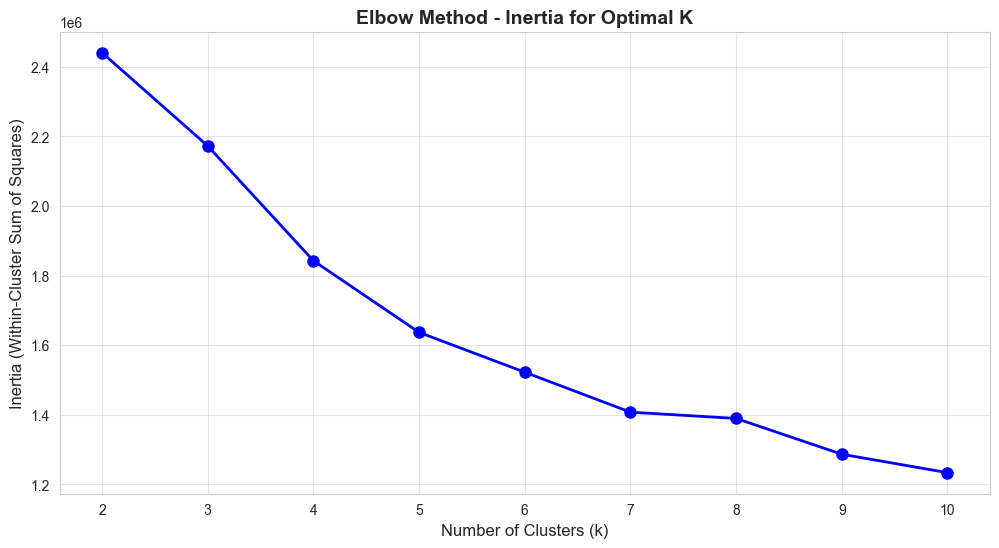

In [20]:
# Calculating optimal K (number of clusters) using Elbow Method based on Inertia (WCSS)


# --- Configuration for Plotting ---
# Setting the plot size for better visibility
plt.rcParams['figure.figsize'] = (12, 6)

# --- Define Search Range ---
inertias = []
K_range = range(2, 11) # Usually K=2 to K=10 is sufficient

# --- Optimization Loop ---
# This loop only calculates Inertia (WCSS), which is fast (O(n))
# assuming 'df' is your large, scaled feature data.

print("Starting Elbow Method calculation on full dataset...")
for k in K_range:
    # Initialize KMeans
    # n_init='auto' is the modern preferred setting
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    
    # Fit the model to the (large) data
    kmeans.fit(df)
    
    # Append the Inertia (WCSS) for the current k
    inertias.append(kmeans.inertia_)
    
    print(f"k={k} calculated. Inertia: {kmeans.inertia_:.2f}")

print("Elbow Method calculation complete.")

# --- Plot the Results ---
plt.figure()
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method - Inertia for Optimal K', fontsize=14, fontweight='bold')
plt.xticks(K_range)
plt.grid(True, alpha=0.5)

# Save the plot
plt.savefig('elbow_method_inertia_plot.png')
# plt.show() # Use this if running in an interactive environment

# The location of the "elbow"/bend in the plot indicates the optimal number of clusters.

In [21]:
# Apply K-Means with optimal k (let's use 5 clusters based on problem statement)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels

print(f"K-Means Clustering with k={optimal_k} completed!")
print(f"\nCluster Distribution:")
print(df['Cluster'].value_counts().sort_index())
print(f"\nCluster Percentages:")
print((df['Cluster'].value_counts(normalize=True).sort_index() * 100).round(2))

K-Means Clustering with k=5 completed!

Cluster Distribution:
Cluster
0     88012
1     32115
2    144768
3     53592
4    139748
Name: count, dtype: int64

Cluster Percentages:
Cluster
0    19.21
1     7.01
2    31.59
3    11.70
4    30.50
Name: proportion, dtype: float64


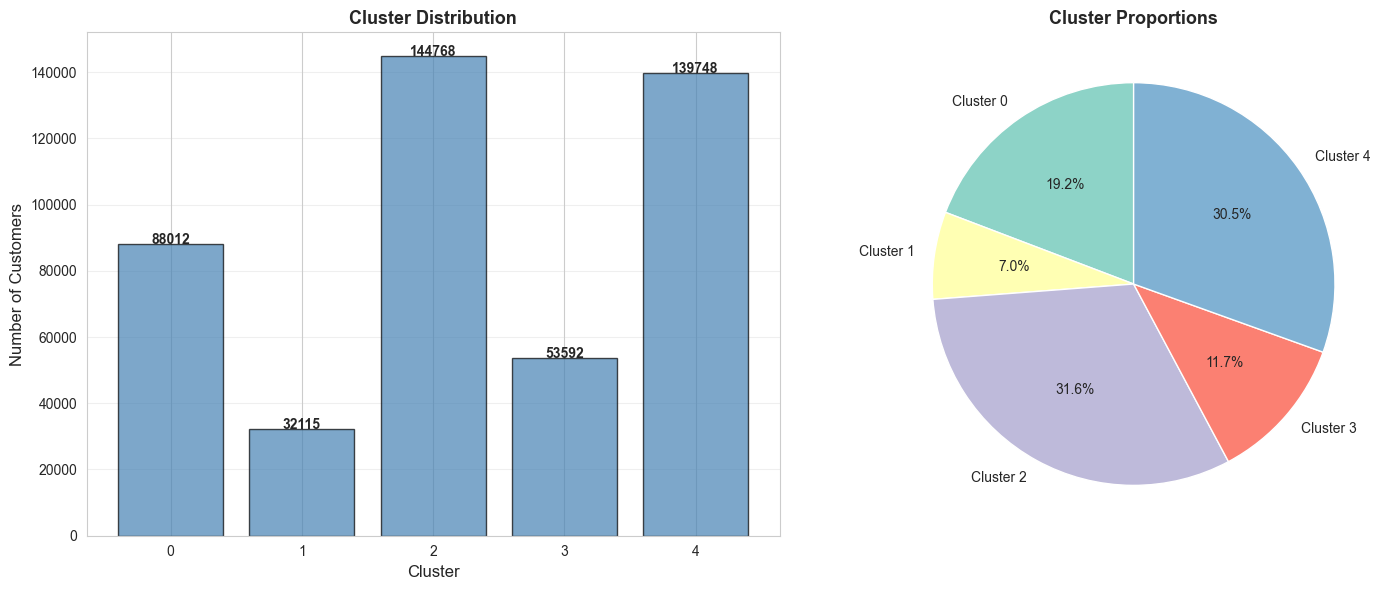


CLUSTER CHARACTERISTICS (Mean values)
         Recency  Frequency  Monetary  Avg_Channel  Avg_Order_Value  \
Cluster                                                               
0           0.10      -0.21     -0.28         1.57            -0.24   
1          -0.90       2.68      2.58         1.82             0.46   
2           0.88      -0.44     -0.49         1.60            -0.43   
3           0.09      -0.31      0.49         1.80             1.85   
4          -0.79       0.09     -0.10         1.63            -0.22   

         Avg_Item_Price  Pct_index_group_name_Ladieswear  \
Cluster                                                    
0                 -0.19                             0.66   
1                  0.31                             0.67   
2                 -0.43                             0.62   
3                  1.77                             0.71   
4                 -0.19                             0.62   

         Pct_index_group_name_Divided  Pct

In [22]:
# Visualize clusters and save results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Cluster distribution
cluster_counts = df['Cluster'].value_counts().sort_index()
axes[0].bar(cluster_counts.index, cluster_counts.values, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_title('Cluster Distribution', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(cluster_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Cluster percentages (pie chart)
colors = plt.cm.Set3(range(optimal_k))
axes[1].pie(cluster_counts.values, labels=[f'Cluster {i}' for i in range(optimal_k)], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Cluster Proportions', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Cluster characteristics
print("\n" + "="*80)
print("CLUSTER CHARACTERISTICS (Mean values)")
print("="*80)
cluster_profiles = df.groupby('Cluster').mean()
print(cluster_profiles.round(2))

# Save segmented data
output_file = 'data/customer_segments.csv'
df.to_csv(output_file, index=False)
print(f"\n✓ Segmented data saved to: {output_file}")

# Save cluster centers
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-1])
centers_df.to_csv('data/cluster_centers.csv', index=False)
print(f"✓ Cluster centers saved to: data/cluster_centers.csv")

In [23]:
df.columns[:-1]

Index(['Recency', 'Frequency', 'Monetary', 'Avg_Channel', 'Avg_Order_Value',
       'Avg_Item_Price', 'Pct_index_group_name_Ladieswear',
       'Pct_index_group_name_Divided', 'Pct_index_group_name_Menswear',
       'Pct_index_group_name_Sport', 'Pct_index_group_name_Baby/Children',
       'age', 'is_newsletter_active'],
      dtype='object')

In [24]:
# Load and display cluster centers
cluster_centers = pd.read_csv('data/cluster_centers.csv')
print("\n" + "="*100)
print("CLUSTER CENTERS (Raw Feature Values)")
print("="*100)
print(cluster_centers.round(3))

# Load segmented data for analysis
segmented_df = pd.read_csv('data/customer_segments.csv')
print(f"\nSegmented data loaded: {segmented_df.shape}")
print(f"Cluster column present: {'Cluster' in segmented_df.columns}")


CLUSTER CENTERS (Raw Feature Values)
   Recency  Frequency  Monetary  Avg_Channel  Avg_Order_Value  Avg_Item_Price  \
0    0.095     -0.212    -0.282        1.566           -0.237          -0.186   
1   -0.905      2.681     2.581        1.821            0.457           0.312   
2    0.876     -0.441    -0.491        1.597           -0.434          -0.428   
3    0.085     -0.311     0.492        1.799            1.854           1.772   
4   -0.791      0.092    -0.097        1.627           -0.218          -0.191   

   Pct_index_group_name_Ladieswear  Pct_index_group_name_Divided  \
0                            0.663                         0.195   
1                            0.667                         0.217   
2                            0.625                         0.237   
3                            0.705                         0.195   
4                            0.619                         0.253   

   Pct_index_group_name_Menswear  Pct_index_group_name_Sport  \
0 

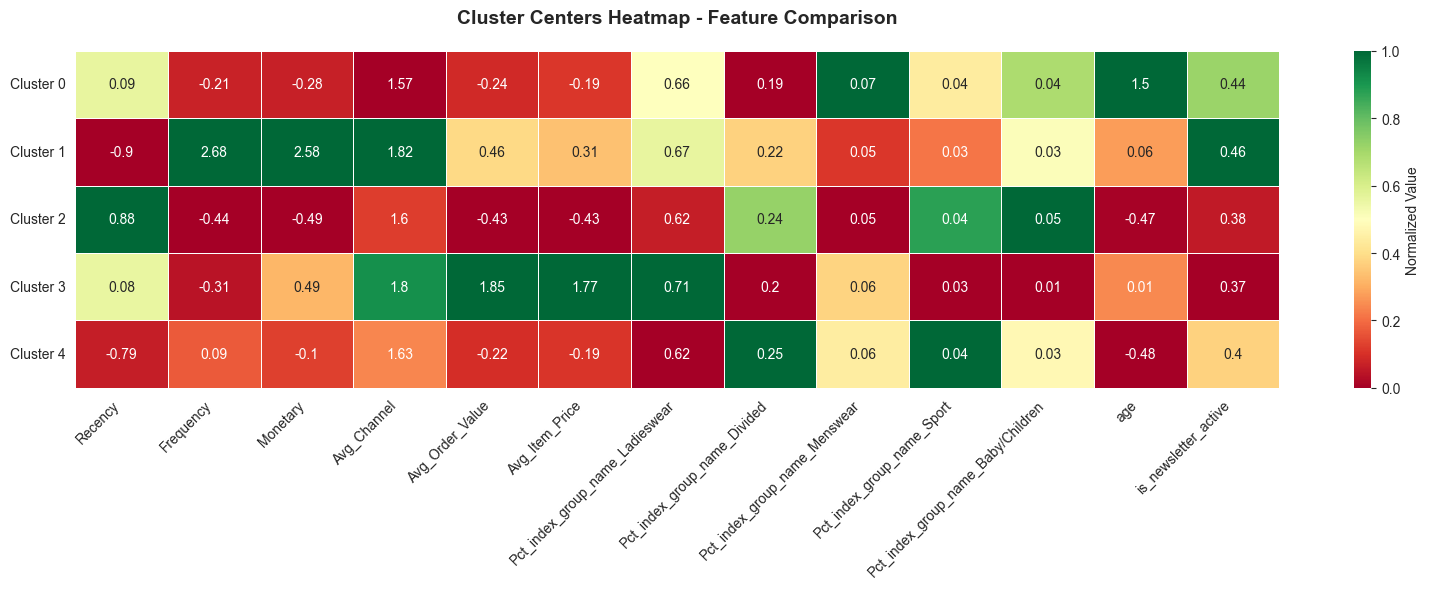

In [25]:
# Normalize cluster centers for comparison (0-1 scale per feature)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
centers_normalized = pd.DataFrame(
    scaler.fit_transform(cluster_centers),
    columns=cluster_centers.columns
)

# Create heatmap for visual comparison
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(centers_normalized, annot=cluster_centers.round(2), fmt='g', 
            cmap='RdYlGn', cbar_kws={'label': 'Normalized Value'}, ax=ax, linewidths=0.5)
ax.set_yticklabels([f'Cluster {i}' for i in range(optimal_k)], rotation=0)
ax.set_title('Cluster Centers Heatmap - Feature Comparison', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
centers_normalized.describe()

,Recency,Frequency,Monetary,Avg_Channel,Avg_Order_Value,Avg_Item_Price,Pct_index_group_name_Ladieswear,Pct_index_group_name_Divided,Pct_index_group_name_Menswear,Pct_index_group_name_Sport,Pct_index_group_name_Baby/Children,age,is_newsletter_active
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.436035,0.257150,0.303228,0.455797,0.314108,0.310778,0.425050,0.419496,0.386341,0.505671,0.534916,0.305485,0.429235
std,0.411340,0.420006,0.407338,0.467189,0.410756,0.404321,0.407839,0.441942,0.388920,0.426357,0.363742,0.409101,0.428823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.063593,0.041772,0.067887,0.121514,0.086240,0.107577,0.064241,0.002362,0.111239,0.214142,0.476855,0.006689,0.055636
50%,0.555585,0.073285,0.128319,0.241704,0.094687,0.109915,0.501609,0.372221,0.375765,0.437787,0.511554,0.245689,0.373456
75%,0.560996,0.170694,0.319935,0.915767,0.389613,0.336396,0.559400,0.722896,0.444703,0.876427,0.686171,0.275049,0.717081
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
print(centers_normalized.min().min())
print(centers_normalized.max().max())

0.0
1.0000000000000004


In [27]:
# Analyze each cluster's behavior - Key metrics
print("\n" + "="*100)
print("DETAILED CLUSTER BEHAVIORAL ANALYSIS")
print("="*100)

key_features = ['Recency', 'Frequency', 'Monetary', 'Avg_Order_Value', 'age']
numeric_features = [col for col in segmented_df.columns if col != 'Cluster' and segmented_df[col].dtype in ['float64', 'int64']]

for cluster_id in range(optimal_k):
    print(f"\n{'─'*100}")
    print(f"CLUSTER {cluster_id}: Behavioral Profile")
    print(f"{'─'*100}")
    
    cluster_data = segmented_df[segmented_df['Cluster'] == cluster_id]
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(segmented_df)*100:.1f}%)")
    
    print(f"\n Key Metrics:")
    for feat in key_features:
        if feat in cluster_data.columns:
            mean_val = cluster_data[feat].mean()
            overall_mean = segmented_df[feat].mean()
            diff_pct = ((mean_val - overall_mean) / overall_mean * 100) if overall_mean != 0 else 0
            indicator = "↑" if diff_pct > 0 else "↓" if diff_pct < 0 else "→"
            print(f"  • {feat:20} : {mean_val:12.2f} {indicator} ({diff_pct:+.1f}% vs avg)")
    
    # Find most distinguishing features
    print(f"\n Distinguishing Features (vs overall average):")
    diffs = {}
    for feat in numeric_features:
        if feat in cluster_data.columns:
            cluster_mean = cluster_data[feat].mean()
            overall_mean = segmented_df[feat].mean()
            if overall_mean != 0:
                diffs[feat] = ((cluster_mean - overall_mean) / overall_mean * 100)
    
    top_features = sorted(diffs.items(), key=lambda x: abs(x[1]), reverse=True)[:3]
    for feat, diff in top_features:
        direction = "HIGH" if diff > 0 else "LOW"
        print(f"  • {feat:30} : {diff:+.1f}% ({direction})")



DETAILED CLUSTER BEHAVIORAL ANALYSIS

────────────────────────────────────────────────────────────────────────────────────────────────────
CLUSTER 0: Behavioral Profile
────────────────────────────────────────────────────────────────────────────────────────────────────
Size: 88012 customers (19.2%)

 Key Metrics:
  • Recency              :         0.10 ↓ (-150227141304042528.0% vs avg)
  • Frequency            :        -0.21 ↓ (-3126142087665512960.0% vs avg)
  • Monetary             :        -0.28 ↓ (-354467973984479360.0% vs avg)
  • Avg_Order_Value      :        -0.24 ↓ (-58732678297808864.0% vs avg)
  • age                  :         1.50 ↓ (-89713198321106848.0% vs avg)

 Distinguishing Features (vs overall average):
  • Frequency                      : -3126142087665512960.0% (LOW)
  • Monetary                       : -354467973984479360.0% (LOW)
  • Recency                        : -150227141304042528.0% (LOW)

───────────────────────────────────────────────────────────────────

In [28]:
# Create business-friendly cluster explanations
print("\n\n" + "="*100)
print("BUSINESS INSIGHTS & CLUSTER INTERPRETATIONS")
print("="*100)

cluster_names = {}
cluster_strategies = {}

for cluster_id in range(optimal_k):
    cluster_data = segmented_df[segmented_df['Cluster'] == cluster_id]
    
    # Calculate key metrics
    recency = cluster_data['Recency'].mean()
    frequency = cluster_data['Frequency'].mean()
    monetary = cluster_data['Monetary'].mean()
    age = cluster_data['age'].mean()
    avg_order_val = cluster_data['Avg_Order_Value'].mean()
    
    overall_recency = segmented_df['Recency'].mean()
    overall_frequency = segmented_df['Frequency'].mean()
    overall_monetary = segmented_df['Monetary'].mean()
    
    # Determine cluster type
    recency_ratio = recency / overall_recency if overall_recency > 0 else 1
    frequency_ratio = frequency / overall_frequency if overall_frequency > 0 else 1
    monetary_ratio = monetary / overall_monetary if overall_monetary > 0 else 1
    
    print(f"\n{'='*100}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*100}")
    
    # Characterize the cluster
    if recency_ratio < 0.5 and frequency_ratio > 1.2 and monetary_ratio > 1.2:
        cluster_names[cluster_id] = " VIP / High-Value Loyal Customers"
        cluster_strategies[cluster_id] = "Premium service, exclusive offers, personalized VIP programs"
    elif recency_ratio < 0.5 and frequency_ratio > 1 and monetary_ratio > 1:
        cluster_names[cluster_id] = " Core / Loyal Customers"
        cluster_strategies[cluster_id] = "Retention programs, loyalty rewards, regular engagement"
    elif recency_ratio > 2 and frequency_ratio < 0.8 and monetary_ratio < 0.8:
        cluster_names[cluster_id] = "  Churned / At-Risk Customers"
        cluster_strategies[cluster_id] = "Re-engagement campaigns, special discounts, win-back offers"
    elif recency_ratio < 1 and frequency_ratio < 0.8 and monetary_ratio < 0.8:
        cluster_names[cluster_id] = " New / Low-Engagement Customers"
        cluster_strategies[cluster_id] = "Onboarding, product discovery, gentle nurturing campaigns"
    elif frequency_ratio > 1 and monetary_ratio > 1:
        cluster_names[cluster_id] = " Medium-Value Active Customers"
        cluster_strategies[cluster_id] = "Growth programs, cross-sell, upsell opportunities"
    else:
        cluster_names[cluster_id] = " Standard Segment"
        cluster_strategies[cluster_id] = "Standard marketing, segment-specific campaigns"
    
    print(f"\n Cluster Name: {cluster_names[cluster_id]}")
    print(f"\n Metrics:")
    print(f"  • Size: {len(cluster_data)} customers ({len(cluster_data)/len(segmented_df)*100:.1f}%)")
    print(f"  • Avg Recency: {recency:.1f} days (vs avg {overall_recency:.1f}, ratio: {recency_ratio:.2f}x)")
    print(f"  • Avg Frequency: {frequency:.2f} orders (vs avg {overall_frequency:.2f}, ratio: {frequency_ratio:.2f}x)")
    print(f"  • Avg Monetary: €{monetary:.2f} (vs avg €{overall_monetary:.2f}, ratio: {monetary_ratio:.2f}x)")
    print(f"  • Avg Age: {age:.1f} years")
    print(f"  • Avg Order Value: €{avg_order_val:.2f}")
    
    print(f"\n Recommended Strategy:")
    print(f"  {cluster_strategies[cluster_id]}")




BUSINESS INSIGHTS & CLUSTER INTERPRETATIONS

CLUSTER 0

 Cluster Name:  Standard Segment

 Metrics:
  • Size: 88012 customers (19.2%)
  • Avg Recency: 0.1 days (vs avg -0.0, ratio: 1.00x)
  • Avg Frequency: -0.21 orders (vs avg 0.00, ratio: -31261420876655128.00x)
  • Avg Monetary: €-0.28 (vs avg €0.00, ratio: -3544679739844793.00x)
  • Avg Age: 1.5 years
  • Avg Order Value: €-0.24

 Recommended Strategy:
  Standard marketing, segment-specific campaigns

CLUSTER 1

 Cluster Name:  Medium-Value Active Customers

 Metrics:
  • Size: 32115 customers (7.0%)
  • Avg Recency: -0.9 days (vs avg -0.0, ratio: 1.00x)
  • Avg Frequency: 2.68 orders (vs avg 0.00, ratio: 395108382985103680.00x)
  • Avg Monetary: €2.58 (vs avg €0.00, ratio: 32409039065319900.00x)
  • Avg Age: 0.1 years
  • Avg Order Value: €0.46

 Recommended Strategy:
  Growth programs, cross-sell, upsell opportunities

CLUSTER 2

 Cluster Name:  Standard Segment

 Metrics:
  • Size: 144768 customers (31.6%)
  • Avg Recency: 0.9

In [35]:
# Create summary table for marketing teams
summary_data = []

for cluster_id in range(optimal_k):
    cluster_data = segmented_df[segmented_df['Cluster'] == cluster_id]
    
    summary_data.append({
        'Cluster': cluster_id,
        'Segment Name': cluster_names.get(cluster_id, 'Segment'),
        'Customer Count': len(cluster_data),
        'Percentage': f"{len(cluster_data)/len(segmented_df)*100:.1f}%",
        'Avg Recency (days)': f"{cluster_data['Recency'].mean():.1f}",
        'Avg Frequency': f"{cluster_data['Frequency'].mean():.2f}",
        'Avg Monetary (€)': f"{cluster_data['Monetary'].mean():.2f}",
        'Avg Age': f"{cluster_data['age'].mean():.1f}",
        'Strategy': cluster_strategies.get(cluster_id, 'Standard')
    })

summary_df = pd.DataFrame(summary_data)

print("\n\n" + "="*150)
print("CLUSTER SUMMARY FOR MARKETING TEAMS")
print("="*150)
print(summary_df.to_string(index=False))

# Save summary
summary_df.to_csv('data/cluster_summary_for_marketing.csv', index=False)
print(f"\n✓ Summary saved to: data/cluster_summary_for_marketing.csv")



CLUSTER SUMMARY FOR MARKETING TEAMS
 Cluster                   Segment Name  Customer Count Percentage Avg Recency (days) Avg Frequency Avg Monetary (€) Avg Age                                          Strategy
       0               Standard Segment           88012      19.2%                0.1         -0.21            -0.28     1.5    Standard marketing, segment-specific campaigns
       1  Medium-Value Active Customers           32115       7.0%               -0.9          2.68             2.58     0.1 Growth programs, cross-sell, upsell opportunities
       2               Standard Segment          144768      31.6%                0.9         -0.44            -0.49    -0.5    Standard marketing, segment-specific campaigns
       3               Standard Segment           53592      11.7%                0.1         -0.31             0.49     0.0    Standard marketing, segment-specific campaigns
       4               Standard Segment          139748      30.5%               -0.8  